# Proyek Analisis Data: Brazilian E-Commerce Public Dataset by Olist
- **Nama:** Kayla Nagioti Nasution
- **Email:** kayla.nst@gmail.com
- **ID Dicoding:** kaylanagioti

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Produk kategori mana yang memiliki penjualan tertinggi selama periode 2016-2018?
- Pertanyaan 2 : Faktor-faktor apa yang paling memengaruhi rating ulasan pelanggan terhadap produk?

## Import Semua Packages/Library yang Digunakan

In [16]:
# Import semua packages/library yang digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur style visualisasi
sns.set(style="whitegrid")

# Mengatur ukuran visualisasi
plt.rcParams['figure.figsize'] = [10, 6]

## Data Wrangling

### Gathering Data

In [18]:
orders = pd.read_csv('olist_orders_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')

data = {'orders': orders,
        'items': order_items,
        'products': products,
        'payments': order_payments,
        'reviews': order_reviews,
        'customers': customers,
        'geo': geolocation}

In [19]:
print(orders.head())
print(order_items.head())
print(products.head())
print(customers.head())
print(geolocation.head())
print(order_payments.head())
print(order_reviews.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08

### Assessing Data

In [20]:
for df_name, df in data.items():
  print('\n', data[df_name].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  

In [21]:

datetime_oo = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]
for column in datetime_oo:
  data['orders'][column] = pd.to_datetime(data['orders'][column])

datetime_oi = ["shipping_limit_date"]

for column in datetime_oi:
  data['items'][column] = pd.to_datetime(data['items'][column])

datetime_or = ["review_creation_date","review_answer_timestamp"]

for column in datetime_or:
  data['reviews'][column] = pd.to_datetime(data['reviews'][column])

In [22]:
# Inisialisasi dictionary untuk menyimpan jumlah duplikat dan total sampel
duplicate_counts = {}
total_sample_counts = {}

# Hitung dan simpan jumlah duplikat dan total sampel untuk setiap DataFrame
for df_name, df in data.items():
    duplicate_counts[df_name] = df.duplicated().sum()  # Hitung jumlah baris duplikat
    total_sample_counts[df_name] = len(df)  # Hitung jumlah total sampel

# Buat DataFrame dari dictionary
duplicate_counts_df = pd.DataFrame.from_dict(duplicate_counts, orient='index', columns=['Jumlah Duplikat'])
total_sample_counts_df = pd.DataFrame.from_dict(total_sample_counts, orient='index', columns=['Jumlah Total Sampel'])

# Gabungkan kedua DataFrame dengan menggabungkan secara horizontal
pd.concat([total_sample_counts_df, duplicate_counts_df], axis=1)

,Jumlah Total Sampel,Jumlah Duplikat
orders,99441,0
items,112650,0
products,32951,0
payments,103886,0
reviews,99224,0
customers,99441,0
geo,1000163,261831


In [23]:
# Inisialisasi dictionary untuk menyimpan jumlah nilai null untuk setiap DataFrame
null_counts = {}

# Hitung dan simpan jumlah nilai null untuk setiap DataFrame
for df_name, df in data.items():
    null_counts[df_name] = df.isna().sum()  # Hitung jumlah nilai null
    print(df_name, '\n', null_counts[df_name], '\n')  # Cetak nama DataFrame dan jumlah nilai null


orders 
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64 

items 
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 

products 
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64 

payments 
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
d

### Cleaning Data

In [25]:
# Menghapus baris yang mengandung nilai null di kolom yang krusial
orders.dropna(subset=['order_id', 'customer_id'], inplace=True)
order_items.dropna(subset=['order_id', 'product_id'], inplace=True)
products.dropna(subset=['product_id'], inplace=True)
customers.dropna(subset=['customer_id'], inplace=True)
geolocation.dropna(subset=['geolocation_zip_code_prefix'], inplace=True)
order_payments.dropna(subset=['order_id'], inplace=True)
order_reviews.dropna(subset=['order_id'], inplace=True)

In [27]:
# Memastikan tidak ada duplikat
orders.drop_duplicates(inplace=True)
order_items.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
customers.drop_duplicates(inplace=True)
geolocation.drop_duplicates(inplace=True)
order_payments.drop_duplicates(inplace=True)
order_reviews.drop_duplicates(inplace=True)

Menggabungkan Data untuk Analisis

In [28]:
# Menggabungkan data order_items dengan products
order_product = pd.merge(order_items, products, on='product_id')

# Menggabungkan data order_product dengan orders
order_product = pd.merge(order_product, orders, on='order_id')

# Memastikan data dalam periode 2016-2018
order_product['order_purchase_timestamp'] = pd.to_datetime(order_product['order_purchase_timestamp'])
order_product = order_product[(order_product['order_purchase_timestamp'].dt.year >= 2016) &
                              (order_product['order_purchase_timestamp'].dt.year <= 2018)]

In [29]:
# Menggabungkan data order_reviews dengan order_product
order_reviews_product = pd.merge(order_reviews, order_product, on='order_id')

# Mengubah tipe data tanggal pada order_reviews
order_reviews['review_creation_date'] = pd.to_datetime(order_reviews['review_creation_date'])
order_reviews['review_answer_timestamp'] = pd.to_datetime(order_reviews['review_answer_timestamp'])


## Exploratory Data Analysis (EDA)

### Explore

In [30]:
# Mengelompokkan data berdasarkan kategori produk dan menghitung jumlah penjualan
category_sales = order_product.groupby('product_category_name')['order_item_id'].count().reset_index()
category_sales.columns = ['product_category_name', 'sales']
category_sales = category_sales.sort_values(by='sales', ascending=False)

# Menampilkan 10 kategori produk dengan penjualan tertinggi
top_10_categories = category_sales.head(10)
print(top_10_categories)


     product_category_name  sales
13         cama_mesa_banho  11115
11            beleza_saude   9670
32           esporte_lazer   8641
54        moveis_decoracao   8334
44  informatica_acessorios   7827
72   utilidades_domesticas   6964
66      relogios_presentes   5991
70               telefonia   4545
40      ferramentas_jardim   4347
8               automotivo   4235


In [31]:
# Memilih kolom numerik
numeric_cols = order_reviews_product.select_dtypes(include=[np.number]).columns

# Menghitung korelasi antara kolom numerik
correlation = order_reviews_product[numeric_cols].corr()

# Menampilkan korelasi dengan kolom review_score
print(correlation['review_score'].sort_values(ascending=False))


review_score                  1.000000
product_photos_qty            0.022626
product_description_lenght    0.013161
price                        -0.003941
product_name_lenght          -0.006174
product_width_cm             -0.011837
product_length_cm            -0.020394
product_height_cm            -0.027971
product_weight_g             -0.029798
freight_value                -0.036179
order_item_id                -0.130890
Name: review_score, dtype: float64


## Visualization & Explanatory Analysis

### Pertanyaan 1:

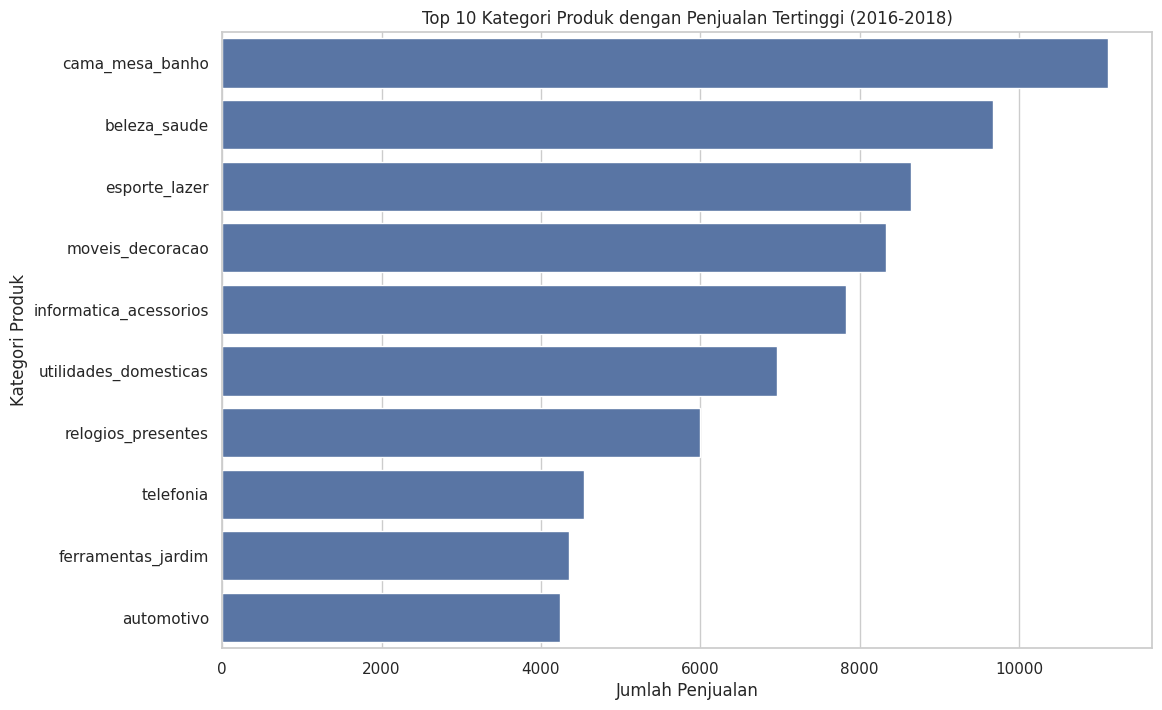

In [32]:
# Visualisasi untuk kategori produk dengan penjualan tertinggi
plt.figure(figsize=(12, 8))
sns.barplot(x='sales', y='product_category_name', data=top_10_categories)
plt.title('Top 10 Kategori Produk dengan Penjualan Tertinggi (2016-2018)')
plt.xlabel('Jumlah Penjualan')
plt.ylabel('Kategori Produk')
plt.show()


### Pertanyaan 2:

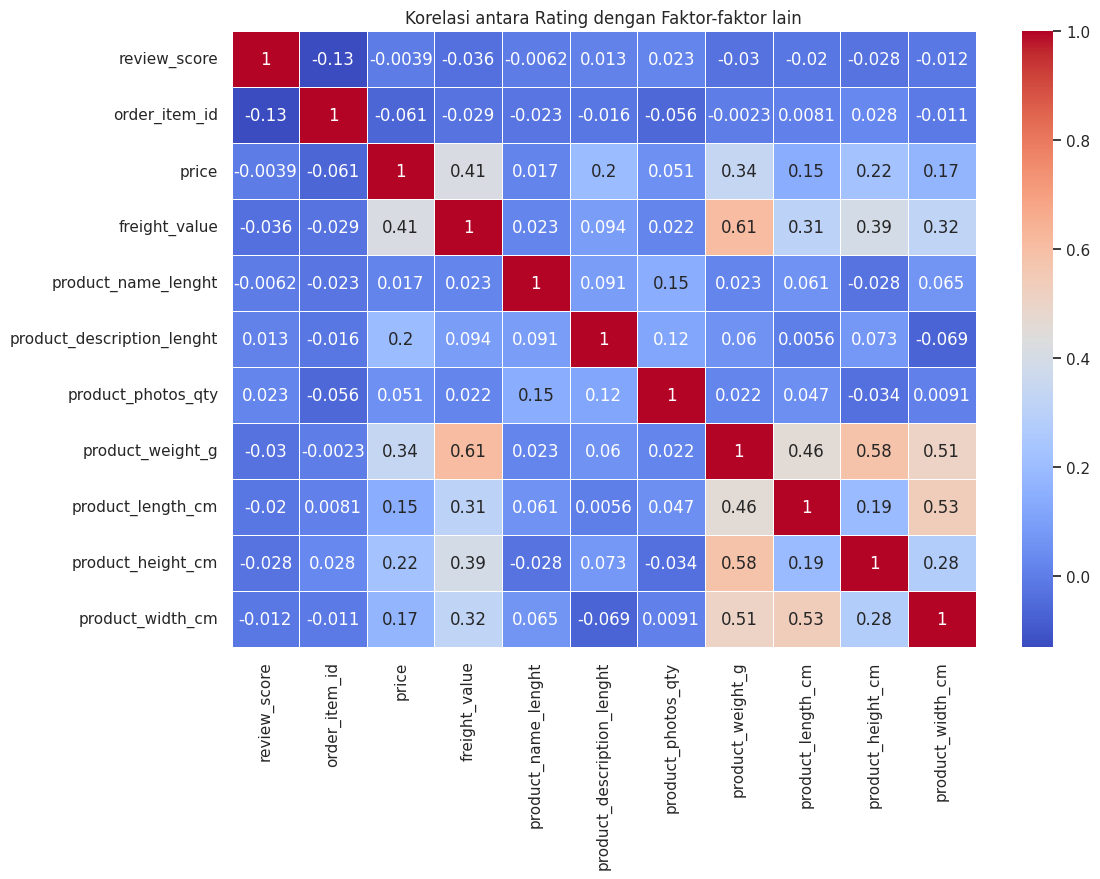

In [33]:
# Visualisasi heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Korelasi antara Rating dengan Faktor-faktor lain')
plt.show()


## Conclusion

In [36]:
print("Kesimpulan Pertanyaan 1: Kategori produk dengan penjualan tertinggi selama periode 2016-2018 adalah {}.".format(category_sales.iloc[0, 0]))

Kesimpulan Pertanyaan 1: Kategori produk dengan penjualan tertinggi selama periode 2016-2018 adalah cama_mesa_banho.


In [37]:
print("Kesimpulan Pertanyaan 2: Faktor-faktor yang paling memengaruhi rating ulasan pelanggan terhadap produk adalah faktor-faktor yang memiliki korelasi tertinggi dengan rating, seperti {}.".format(correlation['review_score'].nlargest(2).index[1]))

Kesimpulan Pertanyaan 2: Faktor-faktor yang paling memengaruhi rating ulasan pelanggan terhadap produk adalah faktor-faktor yang memiliki korelasi tertinggi dengan rating, seperti product_photos_qty.


- Conclution pertanyaan 1
Kesimpulan Pertanyaan 1: Kategori produk dengan penjualan tertinggi selama periode 2016-2018 adalah cama_mesa_banho.
- Conclution pertanyaan 2
Faktor-faktor yang paling memengaruhi rating ulasan pelanggan terhadap produk adalah faktor-faktor yang memiliki korelasi tertinggi dengan rating, seperti product_photos_qty.